<a href="https://colab.research.google.com/github/peterlulu666/Data-Analytics-Using-Python/blob/main/Quantitative_Statistics_using_NumPy_and_Pandas_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__CONTEXT__
<br>The severity and occurrences of the Forest Fires increasing year on year. So, understanding the frequency of the forest fires and finding other patterns using exploratory data analysis can help in taking proactive actions preventing them.

In this section we will look at the Forest Fire Data which has been made available by Brazilian Forest Departments.
This dataset is available at the following location:
<br>https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/949310f1-05bc-4f56-a63f-aef67aac6164

For this execise the data has been pre-formatted and is available as a csv file in the folder named as __dataset__
<br> Make sure that 
- The dataset folder and Python Notebook are at the same level 

__BRIEF ABOUT DATASET__
<br>There are following columns available in the dataset:
-	Year - year the observation belong to
-	State - state in which the fire has been reported
-	Month - month of the year, the fire was reported
-	Number of Fires -number of fires reported
-	Date Reported - date when the fire was reported

In [ ]:
## Import pyplot from matplotlib 
import matplotlib.pyplot as plt

## Define a Plot Method to be used in the notebook to plot the data
def plot_data(df_fires):
    #Creating a Bar Graph
    #Plot X Values and Y Values
    plt.figure(figsize=(25,15))
    plt.bar(df_fires['Month'], df_fires['Number of Fires'], color = (0.5,0.1,0.5,0.6))

    #Add Actual Title and Title for Subheadings
    plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
    plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
    plt.xlabel('Month', fontsize=20) 
    plt.ylabel('Number of Forest Fires', fontsize=20)

#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
    for i, num in enumerate(df_fires['Number of Fires']):
        plt.text(
            i,
            num+2500,
            num,
            ha='center',
            verticalalignment='top',
            fontsize=20)  
    
    plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)

    plt.setp(plt.gca().get_yticklabels(), fontsize=20)

## TO DO - Activity 1 - Import Packages
In the code cell below import the Pandas and NumPy as __pd__ and __np__ respectively

In [ ]:
# Solution for Activity 1 
import pandas as pd
import numpy as np

As a next step we will import the csv data into the Pandas DataFrame.

__NOTE__: We will cover how to do Date Ingestion into Pandas in our next module, so for this exercise the code has been provided for you in the cell below and you simply need to execute it.

In [ ]:
#Read Data from the Datasource
data = pd.read_csv('./dataset/module3/brazilianfire.csv')
data['Number of Fires'] = data['Number of Fires'].astype(int)

## TO DO - Activity 2 - Sample the Data in the Pandas DataFrame

Write the code below to look at top 10 rows in the DataFrame()

In [ ]:
# Solution for Activity 2
#Sampling data in the dataframe, we will look at top 10 rows 
data.head(10)

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0,1/01/1998
1,1999,Acre,January,0,1/01/1999
2,2000,Acre,January,0,1/01/2000
3,2001,Acre,January,0,1/01/2001
4,2002,Acre,January,0,1/01/2002
5,2003,Acre,January,10,1/01/2003
6,2004,Acre,January,0,1/01/2004
7,2005,Acre,January,12,1/01/2005
8,2006,Acre,January,4,1/01/2006
9,2007,Acre,January,0,1/01/2007


## TO DO - Activity 3:
Find how many rows and columns are there in the dataframe. There are multiple ways this information can be extracted. For e.g. you can use the shape attribute of the dataframe.


In [ ]:
##Solution to Activity 3
## What is the shape of the data i.e. how many rows and how many columns exist in the dataset
data.shape

(6454, 5)

So how many rows and columns the dataframe have?

__Number of Rows = 6454__
<br>__Number of Columns = 5__

## TO DO - Activity 4:
Provide the summary statistics for the whole data set i.e. for every columns of the DataFrame.
For this you can use the Data Frame method __.describe()__
- Note though by default summary statistics are only provided for the numeric columns.
- You may have to add __include='all'__ parameter to the method to include statistics for non numeric columns 

In [ ]:
## Solution for Activity 4
#Provide the Summary Statistics for the Data
data.describe()

,Year,Number of Fires
count,6454.000000,6454.000000
mean,2007.461729,108.235358
std,5.746654,190.843947
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


As we can see only the numeric columns are included by default in the summary statistics. So we will pass the parameter include='all' to the method.

In [ ]:
data.describe(include='all')

,Year,State,Month,Number of Fires,Date Reported
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,27,12,NaN,20
top,NaN,Alagoas,January,NaN,1/01/2001
freq,NaN,240,541,NaN,324
mean,2007.461729,NaN,NaN,108.235358,NaN
std,5.746654,NaN,NaN,190.843947,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


As you can see for the non-numeric columns i.e. State, Month and Date Reported only following measurements have been calculated:
- Count or Total Number of Records
- Total Number of Unique Entries.
- Quantitative Statistics for these columns have null values- NaN

In [ ]:
##Check for any missing values
data.isna().sum()

Year               0
State              0
Month              0
Number of Fires    0
Date Reported      0
dtype: int64

## Data Aggregation and Data Groupings

In this segement we will perform some data aggregation activities. 
<br>__NOTE:__ We will cover the Data Wrangling activities using Pandas and NumPy in detail in the subsequent module. So in this module code snippet has been provided for you. You simply need to execute the code cell 

In this section we will now calculate the total number of fires on a month on month basis for the entire period.

In [ ]:
#Grouping the Data on Months Column, and performing the summation on number of fires.
ffire_per_month = data.groupby('Month')['Number of Fires'].sum()
print(ffire_per_month)

Month
April        28188
August       87970
December     57513
February     30848
January      47746
July         92302
June         56003
March        30717
May          34729
November     85471
October      88600
September    58464
Name: Number of Fires, dtype: int32


As you can see the data is not arranged in the order of months, by default the Months has been considered as the row index and lexicographically arranged.

To rearrange this data we will have perform the reindexing operation on the Pandas Series.

## TO DO - Activity 5
Rearrange the data in the Pandas Series __ffire_per_month__, so that data arranged in the actual order of months i.e. January -> Feb -> March and so on and so forth.

1. Create the order list of months 
2. Using reindex method reindex the Series, remember to pass the order list of months as the parameter to the method
3. Store the rearranged the data into the variable __ffire_pm_rearranged__

__Hint__: Remember in case of Pandas Series we can explicitly pass the order list of index to the reindex method and the data will be arranged accordingly.

In [ ]:
## Solution for Activity 5
# list of month
months_unique= list(data.Month.unique())
months_unique

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
ffire_pm_rearranged = ffire_per_month.reindex(months_unique, axis=0)
ffire_pm_rearranged

Month
January      47746
February     30848
March        30717
April        28188
May          34729
June         56003
July         92302
August       87970
September    58464
October      88600
November     85471
December     57513
Name: Number of Fires, dtype: int32

We will now convert the Pandas Series into DataFrame with two columns Months and Number of Fires, and with defaul index for row labels. Once data has been converted into Pandas DataFrame we will plot the data using the pre-defined method available to you.

Below code converts the Pandas Series into a DataFrame and reindex the row labels

In [ ]:
df_ffire_pm = ffire_pm_rearranged.to_frame()
df_ffire_pm.reset_index(level=0, inplace=True)
df_ffire_pm

,Month,Number of Fires
0,January,47746
1,February,30848
2,March,30717
3,April,28188
4,May,34729
5,June,56003
6,July,92302
7,August,87970
8,September,58464
9,October,88600


## TO DO Activity 6 - Call the Plot Function and Pass the DataFrame as Parameter

There is a function that has been defined initially in this notebook. You will now call that function and pass the dataframe __df_ffire_pm__ which you have created in the previous steps.

1. Call function __plot_data()__ and pass the DataFrame __df_ffire_pm__ as the parameter of this function


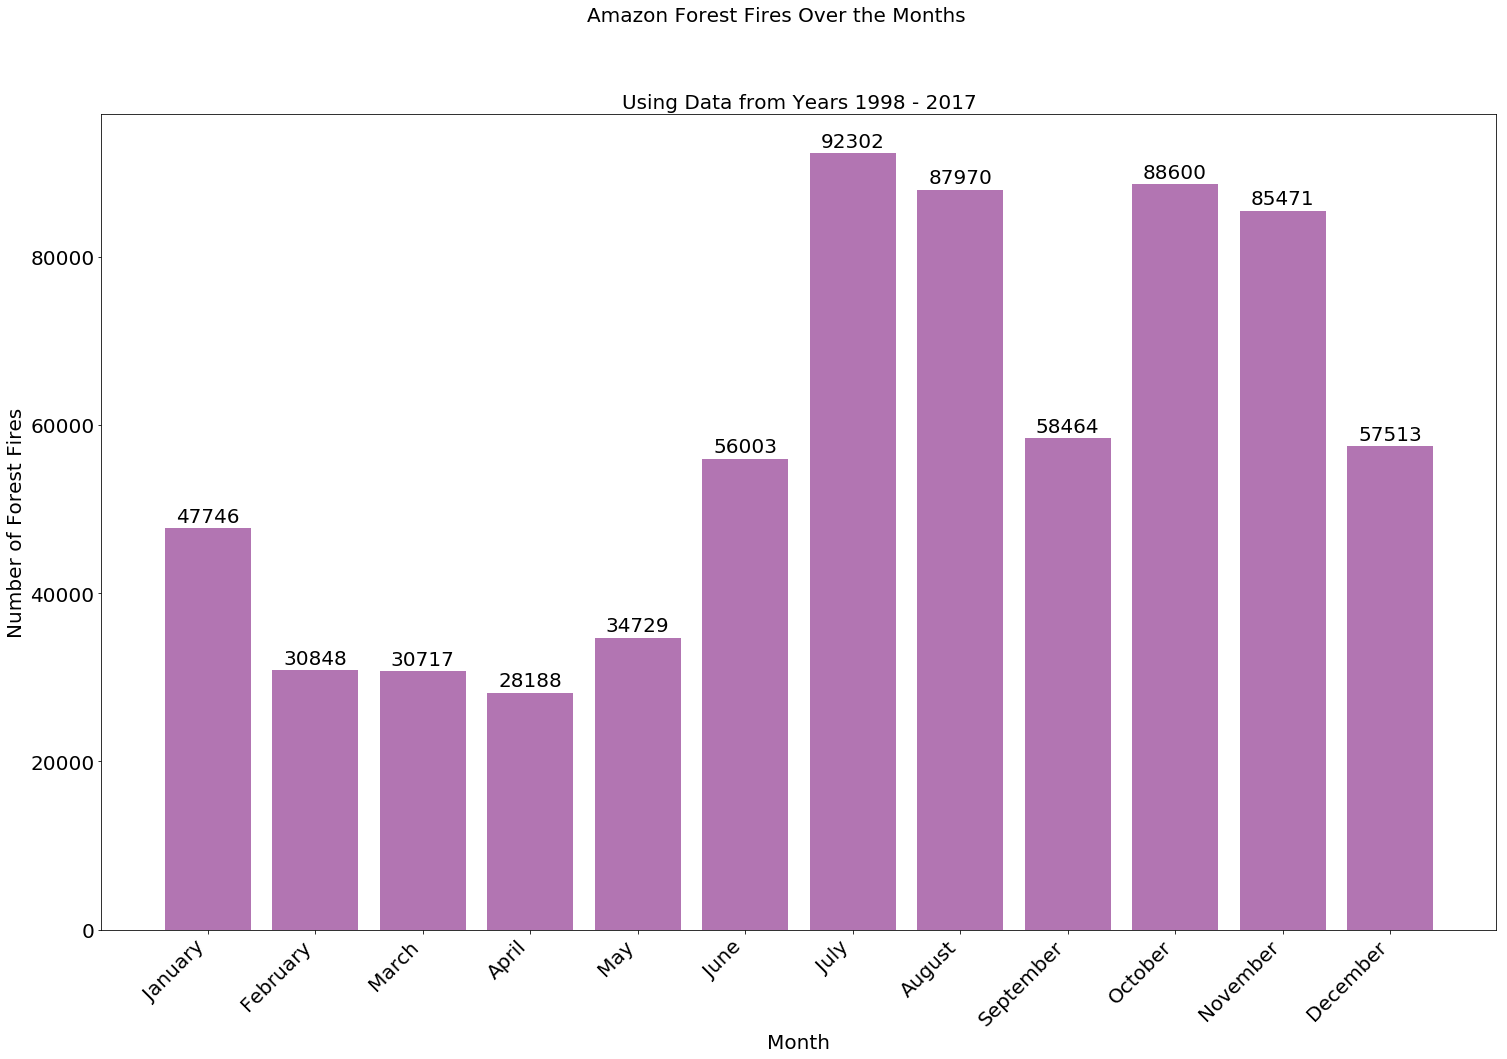

In [ ]:
## Solution for Activity 6
plot_data(df_ffire_pm)

As we can see most number of fires have occured in the month of July, August, October and November.

NOTE:
This exercise has covered some very basic data exploration activities on the dataset. There are lot more analysis that can be performed on this data set

In our upcoming modules we will go into the details of Data Ingestion, Data Wrangling and Exploratory Data Analysis activities using python